### Actividad 7 - Punto 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [4]:
# evaluacion del modelo
def EvaluacionModelo(y_test, y_pred):
    pre_s = metrics.precision_score(y_test, y_pred, average='micro')
    rec_s = metrics.recall_score(y_test, y_pred, average='micro')
    f1_s = metrics.f1_score(y_test, y_pred, average='micro')
    accu_s = metrics.accuracy_score(y_test, y_pred)
    return (pre_s, rec_s, f1_s, accu_s)

#### Importacion del Dataset

In [5]:
data_iris = datasets.load_iris()

In [6]:
# primeros 100 rows (solo 2 clases)
caracteristicas = data_iris.data[:100,:]
caracteristicas.shape

(100, 4)

In [7]:
# primeras 100 etiquetas
etiquetas = data_iris.target[:100]
etiquetas.shape

(100,)

In [8]:
scaler = StandardScaler()
# normalizacion de los datos de las caracteristicas
caracteristicas_norm = scaler.fit_transform(caracteristicas)

#### Separacion de datos de prueba y testing

In [9]:
# separacion de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(caracteristicas_norm,etiquetas, train_size = 0.8 )

#### Visualizacion de los datos

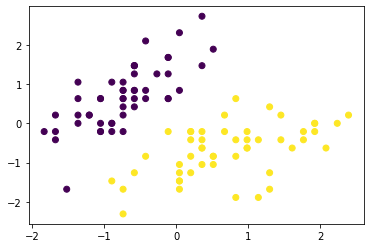

In [10]:
plt.scatter(caracteristicas_norm[:,0], caracteristicas_norm[:,1], c=etiquetas)

### Modelo de Regresion Logistica

In [11]:
# instancia del modelo de regresion logistica
modelo = LogisticRegression()
modelo_entrenado = modelo.fit(X = x_train, y = y_train)
y_pred = modelo_entrenado.predict(x_test)

#### Evaluacion Modelo de Regresion Logistica

In [12]:
# matriz de confusion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  0],
       [ 0, 11]], dtype=int64)

In [13]:
precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_pred)
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 1.0, F1: 1.0, Accuracy: 1.0


### Modelo Naive Bayes Gaussiano

In [14]:
# obtenemos todas las caracteristicas
caracteristicas = data_iris.data
caracteristicas.shape

(150, 4)

In [15]:
# obtenemos todas las clases (3)
etiquetas = data_iris.target
etiquetas.shape

(150,)

In [16]:
# separacion de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(caracteristicas,etiquetas, train_size = 0.8 )

In [23]:
# modelo Gaussian Naive Bayes
NVG = GaussianNB()
# entrenamiento del modelo
modelo_entrenado = NVG.fit(x_train, y_train)
# prediccion
y_predict = NVG.predict(x_test)

#### Evaluacion Modelo de Naive Bayes Gaussiano

In [24]:
# uso de la matriz de confusion para evaluacion del modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  9]], dtype=int64)

In [25]:
precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_predict)
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 1.0, F1: 1.0, Accuracy: 1.0


### Conclusiones
Ambos modelos dieron buenos resultados, de hecho podría decirse que están sobre ajustados. En las primeras ejecuciones el modelo de Naive Bayes daba resultados alrededor del 97%, pero en subsecuentes ejecuciones el accuracy llego al 100%. Una de las ventajas que se puede observar al usar un modelo como Naive Bayes es que podemos tener múltiples clases a diferencia del modelo de regresión logística el cual debe ser binario.